# Universal Features of Epidemic Models

## Objective
This notebook is dedicated to understand how social distancing will effect the spread of an epidemic.
## Setup

In [1]:
using DifferentialEquations, Plots, Plots.PlotMeasures
pyplot()

Plots.PyPlotBackend()

## Utility functions

In [2]:
# change plot fonts
bplot(p, s) = plot!(p, titlefont=font(s, "Times"), xguidefontsize=s-4
    , ytickfont=font(s-4, "Times"), margin=8mm, yguidefontsize=s-4
    , xtickfont = font(s-4, "Times"), legendfont = font(s-4, "Times"))

# this function will generate a T period of social distancing at time t0
sinput(t, ts, td) = if (t-ts<0 || t-ts-td>0) 0 else 1 end

sinput (generic function with 1 method)

# $SIR$ Model

## Basics

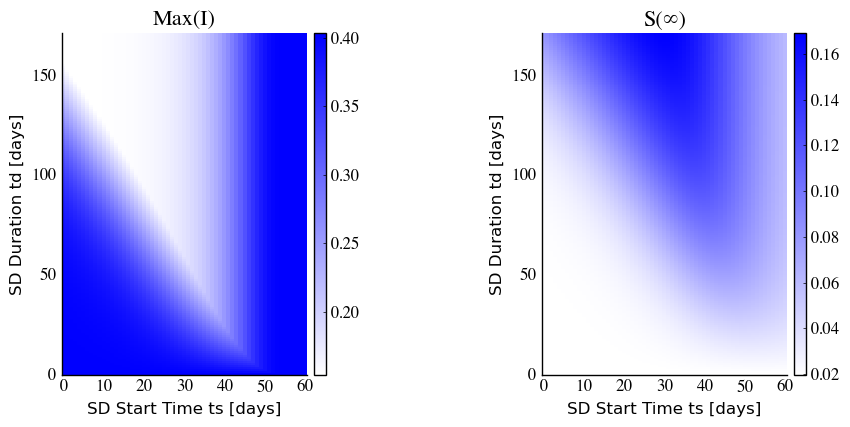

In [20]:
# model description
function SIR(dx,x,p,t)
    b, db, g, ts, td = p
    u = b - db.*sinput(t, ts, td)
    dx[1] = -u*x[1]*x[2]
    dx[2] = u*x[1]*x[2] - g*x[2]
    dx[3] = g*x[2]
end

beta, bdiff, gamma, ts, td  = [0.2,0.1,0.05,0,0]

# ode solver
alg = BS3()
u0 = [1-1e-3, 1e-3, 0.]
p  = [beta, bdiff, gamma, 0, 0]
tspan = (0.0, 1e4)

Trng = 0:170
trng = 0:60
data = zeros(size(Trng,1), size(trng,1))
sata = zeros(size(Trng,1), size(trng,1))

for i = 1:size(Trng,1)
    for j = 1:size(trng,1)
        p[4:5] = [trng[j], Trng[i]]
        prob = ODEProblem(SIR, u0, tspan, p)
        sol  = solve(prob, BS3(), reltol=1e-8, abstol=1e-8, saveat=0.1)
        data[i,j] = maximum(sol[2,:])
        sata[i,j] = sol[1,end]
    end
end

p1 = heatmap(trng, Trng, data,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)")
p1 = bplot(p1, 16)

p2 = heatmap(trng, Trng, sata,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="S(∞)")
p2 = bplot(p2, 16)

fig = plot(p1, p2, layout=(1,2), size=(960,470))
savefig(fig, "figures/SIR_S.png")
savefig(fig, "figures/SIR_S.svg")

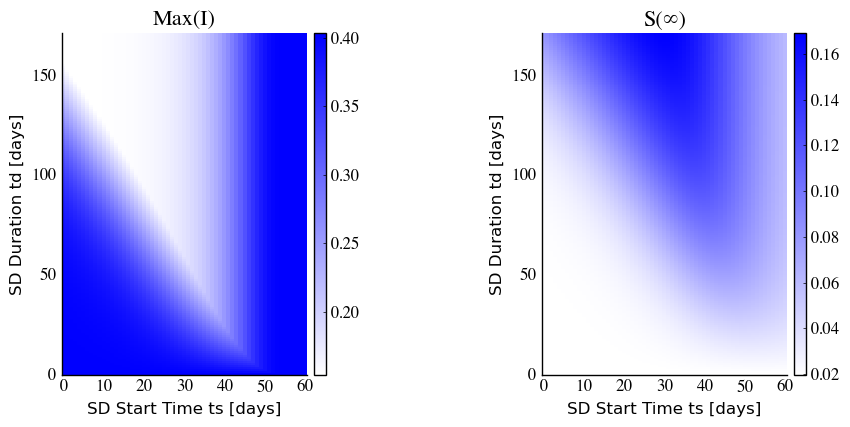

In [19]:
p1 = heatmap(trng, Trng, data,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)")
p1 = bplot(p1, 16)

p2 = heatmap(trng, Trng, sata,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="S(∞)")
p2 = bplot(p2, 16)

fig = plot(p1, p2, layout=(1,2), size=(960,470))
savefig(fig, "figures/SIR_S.png")
savefig(fig, "figures/SIR_S.svg")

# Provenance

In [15]:
using Dates
println("mahdiar")
Dates.format(now(), "Y/U/d HH:MM")  

mahdiar


"2021/March/14 15:16"